In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv('Bengaluru_House_Data.csv')
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
cat_=dataset.dtypes=='object'
cat__=list(cat_[cat_].index)
print(cat__, len(cat__))

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft'] 6


In [6]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
for i in cat__:
    print(i, "- ", dataset[i].isnull().sum())

area_type -  0
availability -  0
location -  1
size -  16
society -  5502
total_sqft -  0


In [8]:
dataset.drop(columns='society', inplace=True)

In [9]:
for i in dataset.columns:
    if i in cat__:
        print(i, "- ",dataset[i].nunique(), " CAT ")

    else:
        print(i, "- ",dataset[i].nunique(), "NON CAT")
        

area_type -  4  CAT 
availability -  81  CAT 
location -  1305  CAT 
size -  31  CAT 
total_sqft -  2117  CAT 
bath -  19 NON CAT
balcony -  4 NON CAT
price -  1994 NON CAT


In [10]:
dataset=dataset.dropna()

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [12]:
# One Hot Encoding


dataset=pd.get_dummies(dataset, columns=['area_type', 'availability', 'location', 'size', 'total_sqft'])

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X=dataset.drop(columns='price')

Y=dataset['price']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [14]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

ridge=Ridge(alpha=1.0)



In [15]:
ridge.fit(X_train, Y_train)

Ridge()

In [16]:
predictions=ridge.predict(X_test)

In [17]:
mse= mean_squared_error(Y_test, predictions)
mse

11692.440430507575

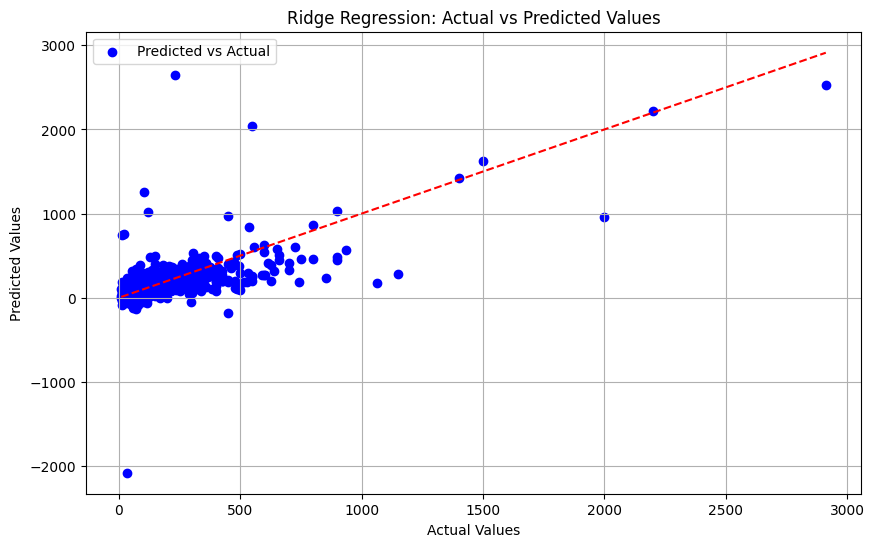

In [18]:
plt.figure(figsize=(10, 6))


plt.scatter(Y_test, predictions, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.legend()


plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')

plt.grid(True)
plt.show()